<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-1:-Full-Series-of-Publications" data-toc-modified-id="Model-1:-Full-Series-of-Publications-1">Model 1: Full Series of Publications</a></span><ul class="toc-item"><li><span><a href="#LDA-modelling:" data-toc-modified-id="LDA-modelling:-1.1">LDA modelling:</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-1.2">Visualisation</a></span></li></ul></li><li><span><a href="#Model-2:-2012-2017-LDA" data-toc-modified-id="Model-2:-2012-2017-LDA-2">Model 2: 2012-2017 LDA</a></span><ul class="toc-item"><li><span><a href="#LDA-Modelling" data-toc-modified-id="LDA-Modelling-2.1">LDA Modelling</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-2.2">Visualisation</a></span></li></ul></li></ul></div>

In [1]:
import cPickle as pkl
from gensim import models
from gensim.corpora import Dictionary

In [2]:
# ref: http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/Gensim%20Newsgroup.ipynb
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [3]:
pyLDAvis.enable_notebook()

In [4]:
import pandas as pd

# Model 1: Full Series of Publications

From `preprocess_pubs.ipynb` in [infnet-scrapper](../infnet-scrapper/notebooks/preprocess_pubs.ipynb), we generate tokens for our publications.

Now, we use these tokens to create a dictionary, corpus, and topic models for each of the documents

In [5]:
pub_toks = pkl.load(open('../data/pub_toks.pkl'))

In [6]:
pub_toks.head(3)

,year,title,abstract,publications,summary,summary_toks
pub_id,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",query processing in data integration in this c...,"[queri, process, data, integr, chapter, illust..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,comprehension syntax,the syntax of comprehensions is very close to ...,sigmod record,comprehension syntax the syntax of comprehensi...,"[comprehens, syntax, syntax, comprehens, close..."


In [7]:
toks = pub_toks.summary_toks.tolist() # List of List

In [8]:
# Create the dictionary mapping:
dictionary = Dictionary(toks)
dictionary.compactify()
# ignore words that appear in less than 20 documents or more than 10% documents
dictionary.filter_extremes(no_below=20, no_above=0.1) 
# Create a bow tagging for each publication:
bowified = lambda row: dictionary.doc2bow(row.summary_toks)
pub_toks['bow'] = pub_toks.apply(bowified, axis=1)

In [9]:
pub_toks.head(2)

,year,title,abstract,publications,summary,summary_toks,bow
pub_id,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[balloon, stabil, analysi, jet, hmode, dischar...","[(145, 1), (211, 2), (279, 2), (308, 1), (451,..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",query processing in data integration in this c...,"[queri, process, data, integr, chapter, illust...","[(217, 1), (241, 1), (300, 2), (309, 1), (364,..."


In [10]:
# Generate a corpus based on the tokens, which we will be using later
corpus = pub_toks.bow.tolist()

In [25]:
# Save the dictionary:
dictionary.save('../data/dictionary_fullpub.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(pub_toks, open('../data/pub_toks_wBOW_fullpub.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus, open('../data/corpus_fullpub.pkl', 'wb'), -1)

## LDA modelling:

In [12]:
num_topics = 20
lda = models.ldamodel.LdaModel(
    corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)

In [30]:
# Save the model:
lda.save('../data/fullpub.ldamodel')

## Visualisation

In [14]:
vis_data = gensimvis.prepare(lda, corpus, dictionary)

/home/goweiting/miniconda2/envs/python27/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [15]:
pyLDAvis.display(vis_data)

---
# Model 2: 2012-2017 LDA
Instead of using the entire collection, we use the collection from the past five years

In [16]:
gb = pub_toks.groupby('year')

In [17]:
sixYears = ['2017', '2016', '2015', '2014', '2013', '2012']
pd_years = {}
print("Year:\tPub count")
for yr, group in gb:
    if yr in sixYears:
        pd_years[yr] = group
        print("{}:\t{}".format(yr, len(group)))

Year:	Pub count
2012:	573
2013:	623
2014:	629
2015:	583
2016:	645
2017:	521


In [18]:
combined_yrs = pd.concat(pd_years.values())

In [19]:
print("Total publications: ",len(combined_yrs))

('Total publications: ', 3574)


In [20]:
combined_yrs.head(3)

,year,title,abstract,publications,summary,summary_toks,bow
pub_id,,,,,,,
a6c66577-d952-4d24-baa3-2707102e7470,2015,probabilistic programs as spreadsheet queries,"we describe the design, semantics, and impleme...","programming languages and systems,24th europea...",probabilistic programs as spreadsheet queries ...,"[probabilist, program, spreadsheet, queri, des...","[(80, 2), (130, 1), (165, 1), (364, 2), (451, ..."
7f8c35ed-b32c-4fc2-9a90-dc63961a12cb,2015,artificial personality and disfluency,the focus of this paper is artificial voices w...,interspeech 2015 16th annual conference of the...,artificial personality and disfluency the focu...,"[artifici, person, disfluenc, focus, paper, ar...","[(16, 3), (202, 1), (357, 1), (469, 1), (471, ..."
04cc8d28-b54c-40e9-9ec3-6746a37319f8,2015,anchoring knowledge in interaction towards a h...,we outline a proposal for a research program l...,"artificial general intelligence,8th internatio...",anchoring knowledge in interaction towards a h...,"[anchor, knowledg, interact, harmon, subsymbol...","[(152, 1), (236, 1), (293, 1), (298, 1), (300,..."


In [21]:
length = combined_yrs.apply(lambda row: len(row.summary_toks),axis=1)

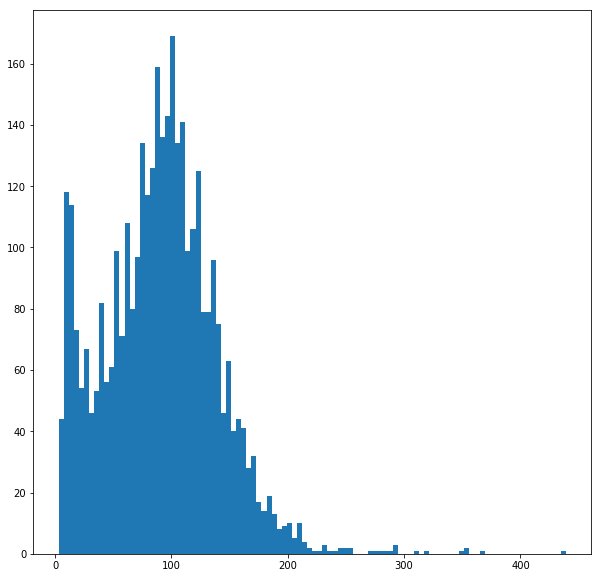

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.hist(length,bins=100)
plt.show()

In [21]:
toks_6yr = combined_yrs.summary_toks.tolist() # List of List

In [22]:
# Create the dictionary mapping:
dictionary_6yr = Dictionary(toks_6yr)
dictionary_6yr.compactify()
dictionary_6yr.filter_extremes(no_below=20, no_above=0.1)
# Create a bow tagging for each publication:
bowified = lambda row: dictionary_6yr.doc2bow(row.summary_toks)
combined_yrs['bow'] = combined_yrs.apply(bowified, axis=1)

In [23]:
corpus_6yr = combined_yrs.bow.tolist()

In [27]:
# Save the dictionary:
dictionary_6yr.save('../data/dictionary_6yr.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(combined_yrs, open('../data/pub_toks_wBOW_6yr.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus_6yr, open('../data/corpus_6yr.pkl', 'wb'), -1)

## LDA Modelling

In [28]:
num_topics = 20
lda_6yr = models.ldamodel.LdaModel(
    corpus=corpus_6yr,
    id2word=dictionary_6yr,
    num_topics=num_topics,
    passes=10)

In [31]:
# Save the model:
lda_6yr.save('../data/6yr.ldamodel')

In [46]:
# we can check the distribution:
dictionary_6yr.doc2bow(['tree'])

[(168, 1)]

In [45]:
lda_6yr.get_topic_terms(0)

[(168, 0.041298619004022638),
 (702, 0.016027947586980906),
 (140, 0.014891558170013213),
 (122, 0.013567037353829603),
 (620, 0.01350874076111285),
 (1497, 0.013417752449426791),
 (1595, 0.012311221867655382),
 (476, 0.011519817032102879),
 (401, 0.011227522127546789),
 (536, 0.01109819045270098)]

## Visualisation

In [32]:
vis_data_6yr = gensimvis.prepare(lda_6yr, corpus_6yr, dictionary_6yr, sort_topics=False)

/home/goweiting/miniconda2/envs/python27/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [33]:
pyLDAvis.display(vis_data_6yr)

Note: comparing the intetopic distance between the fullpub model and 6yr model, the distribution is slightly better; topic size is more average